In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

print(tf.__version__)
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"




2.10.0


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

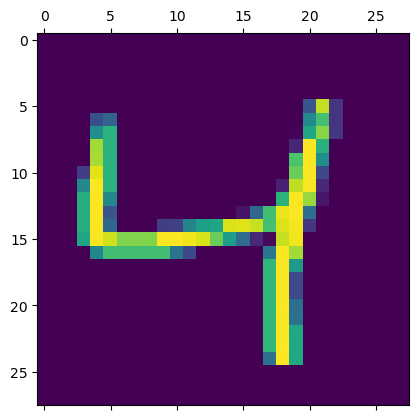

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4697 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2731 - accuracy: 0.9239


[0.2731250822544098, 0.9239000082015991]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([4.1666534e-02, 3.2900402e-07, 6.6207394e-02, 9.6061993e-01,
       3.0640184e-03, 1.1236496e-01, 2.8616003e-06, 9.9982810e-01,
       8.7439604e-02, 6.1310071e-01], dtype=float32)

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   9,    9,  921,   19,    9,    2,   13,   10,   36,    4],
       [   4,    0,   17,  935,    1,   17,    3,   11,   15,    7],
       [   2,    1,    2,    1,  918,    0,   12,    4,   10,   32],
       [  11,    3,    3,   48,   11,  757,   21,    6,   26,    6],
       [  14,    3,    2,    2,    7,    7,  920,    2,    1,    0],
       [   2,    5,   24,    6,    8,    0,    0,  954,    2,   27],
       [  13,    8,    6,   35,    9,   24,   10,   14,  850,    5],
       [  11,    7,    1,   16,   33,    5,    0,   28,    2,  906]])>

Text(95.72222222222221, 0.5, 'Truth')

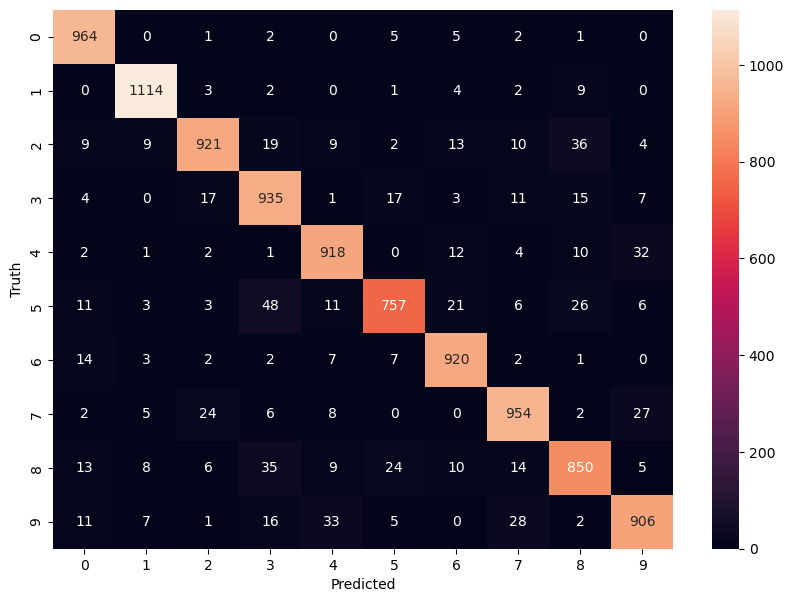

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
#hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2711 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1199 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0824 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0628 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0487 - accuracy: 0.9850


In [21]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0770 - accuracy: 0.9764


[0.07699451595544815, 0.9764000177383423]

313/313 [==============================] - 2s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

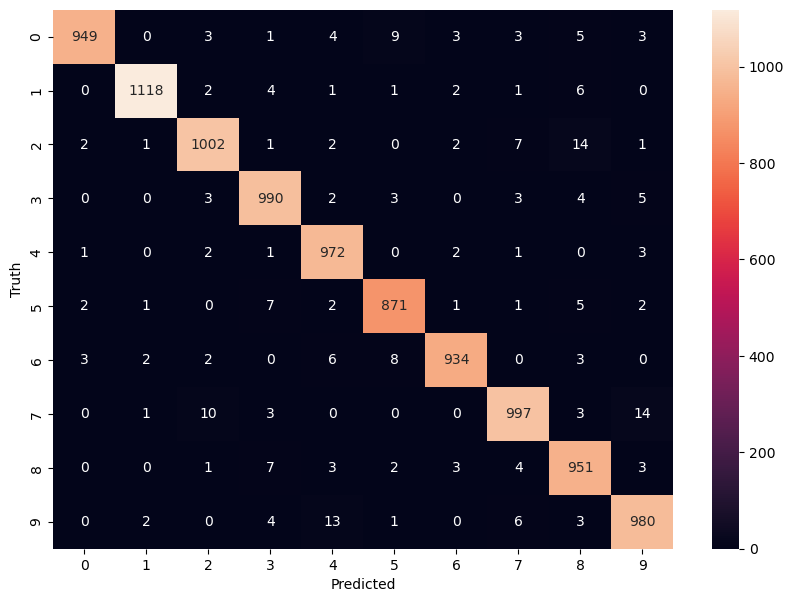

In [22]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9789


[0.07784869521856308, 0.9789000153541565]